Justin Roderick

CAP 4611

# Homework 5

This homework asks you to create your first Neural Network.

In this Homework, you will be using the MNIST Dataset from Keras

You will write code and discussion into code and text cells in this notebook.

If a code block starts with TODO:, this means that you need to write something there.

There are also markdown blocks with questions. Write the answers to these questions in the specified locations.

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
The points add up to 10. Extensive partial credit will be offered. Thus, make sure that you are at least attempting all problems.

Make sure to comment your code, such that the grader can understand what different components are doing or attempting to do.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten, Dropout
from keras.utils import to_categorical

# A. Setup (2 points).

In this project we are going to create a Neural Network which will train on the MNIST dataset.

The Dataset contains 60000 Training images and 10000 Testing images and the images are from 10 classes.

You will be loading the MNIST datset in training and testing variables.

Display the first 10 images using Matplotlib

Print the shape of the data points

Normalize the Data in [0,1] range.

Convert the labels into one hot code encoding

11490434/11490434 [==============================] - 1s 0us/step


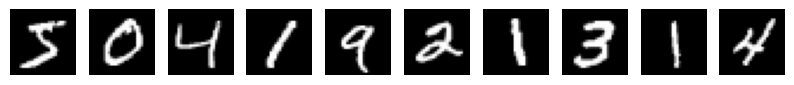

Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)


In [2]:
#TODO
# Load Data from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the first 10 images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the shapes
print("Shape of training images:", train_images.shape)
print("Shape of testing images:", test_images.shape)

# Normalize the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Create the one hot code encoding for the labels
num_classes = 10
trainy = to_categorical(train_labels, num_classes)
testy = to_categorical(test_labels, num_classes)

# B. Creating a Dense Neural Network to train on this data. (4 Points)

In this section you will be creating a Neural Netwok based on the specifications
below. This exercise will help you create the network and help run the code.

Input Layer-> Flatten Layer that convert the image matrix to a vector

Hidden Layer->Dense Layer with 4 units and sigmoid activation

Output Layer-> Dense Layer with 10 units and softmax activation.

Print the Summary of the model at the end

In [3]:
#TODO
# Flatten the images and make reshape to 28, 28
trainx = train_images.reshape(train_images.shape[0], 28, 28)
testx = test_images.reshape(test_images.shape[0], 28, 28)

# Create Model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(4, activation='sigmoid'),  # Hidden layer with 4 units and sigmoid activation
    Dense(10, activation='softmax')  # Output layer with 10 units and softmax activation
])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3190 (12.46 KB)
Trainable params: 3190 (12.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile and Run the Model

Epoch 1/25
422/422 [==============================] - 2s 4ms/step - loss: 1.9874 - accuracy: 0.3140 - val_loss: 1.7254 - val_accuracy: 0.4942
Epoch 2/25
422/422 [==============================] - 2s 4ms/step - loss: 1.5724 - accuracy: 0.5857 - val_loss: 1.4051 - val_accuracy: 0.6800
Epoch 3/25
422/422 [==============================] - 2s 4ms/step - loss: 1.3269 - accuracy: 0.6711 - val_loss: 1.2016 - val_accuracy: 0.7138
Epoch 4/25
422/422 [==============================] - 1s 3ms/step - loss: 1.1667 - accuracy: 0.6994 - val_loss: 1.0613 - val_accuracy: 0.7385
Epoch 5/25
422/422 [==============================] - 1s 3ms/step - loss: 1.0541 - accuracy: 0.7236 - val_loss: 0.9596 - val_accuracy: 0.7655
Epoch 6/25
422/422 [==============================] - 2s 5ms/step - loss: 0.9677 - accuracy: 0.7502 - val_loss: 0.8749 - val_accuracy: 0.7962
Epoch 7/25
422/422 [==============================] - 1s 3ms/step - loss: 0.8977 - accuracy: 0.7699 - val_loss: 0.8075 - val_accuracy: 0.8108
Epoch 

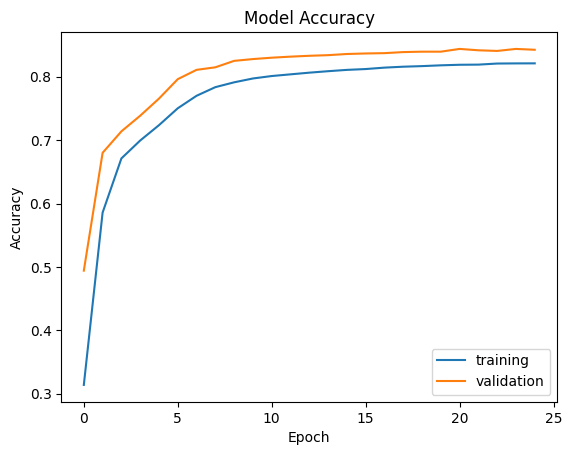

In [4]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# Extra Credit (2 Points)
Create a Neural Network that will have more than 95% Training Accuracy

In [5]:
#TODO
# Build a more complex model with more layers
model = Sequential([
    Flatten(input_shape=(28, 28)),               # Input layer
    Dense(128, activation='relu'),               # Dense layer with 128 units and ReLU activation
    Dropout(0.5),                                # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),                # Dense layer with 64 units and ReLU activation
    Dropout(0.5),                                # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),                # Dense layer with 32 units and ReLU activation
    Dense(num_classes, activation='softmax')     # Output layer with 10 units and softmax activation
])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)               

# Compile the Model again

Epoch 1/25
422/422 [==============================] - 5s 9ms/step - loss: 0.8428 - accuracy: 0.7284 - val_loss: 0.2018 - val_accuracy: 0.9423
Epoch 2/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3925 - accuracy: 0.8903 - val_loss: 0.1490 - val_accuracy: 0.9583
Epoch 3/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3191 - accuracy: 0.9107 - val_loss: 0.1281 - val_accuracy: 0.9628
Epoch 4/25
422/422 [==============================] - 2s 6ms/step - loss: 0.2802 - accuracy: 0.9223 - val_loss: 0.1175 - val_accuracy: 0.9660
Epoch 5/25
422/422 [==============================] - 3s 8ms/step - loss: 0.2498 - accuracy: 0.9298 - val_loss: 0.1082 - val_accuracy: 0.9695
Epoch 6/25
422/422 [==============================] - 3s 6ms/step - loss: 0.2312 - accuracy: 0.9360 - val_loss: 0.0974 - val_accuracy: 0.9722
Epoch 7/25
422/422 [==============================] - 2s 6ms/step - loss: 0.2198 - accuracy: 0.9394 - val_loss: 0.0953 - val_accuracy: 0.9730
Epoch 

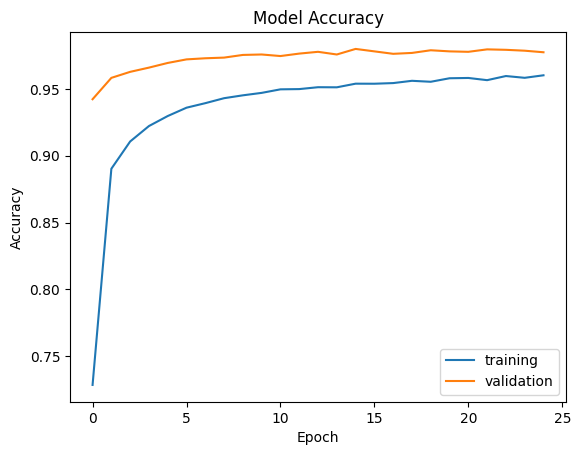

In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# C: Using Convolutions instead of all Dense Layers to train on Dataset    

# (4 Points)

Using the Dense Layer model, we achieved around 84% Accuracy. Lets see if
Convolution Layers can help improve the model.
Create a Neural Network model which will use Convolutional Layers to Learn
about the data.

Acheive a Training Accuracy of 90%

In [7]:
# New model with 2 convolution layers to improve the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),                           # Second convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')                         # Output layer with softmax activation
])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Compile the Convolutional Neural Netowrk

Epoch 1/25
422/422 [==============================] - 43s 100ms/step - loss: 0.3510 - accuracy: 0.8947 - val_loss: 0.0637 - val_accuracy: 0.9823
Epoch 2/25
422/422 [==============================] - 40s 96ms/step - loss: 0.1117 - accuracy: 0.9674 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 3/25
422/422 [==============================] - 40s 96ms/step - loss: 0.0850 - accuracy: 0.9746 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 4/25
422/422 [==============================] - 40s 96ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 5/25
422/422 [==============================] - 42s 99ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0318 - val_accuracy: 0.9913
Epoch 6/25
422/422 [==============================] - 42s 99ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0339 - val_accuracy: 0.9907
Epoch 7/25
422/422 [==============================] - 40s 95ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0289 - val_accuracy

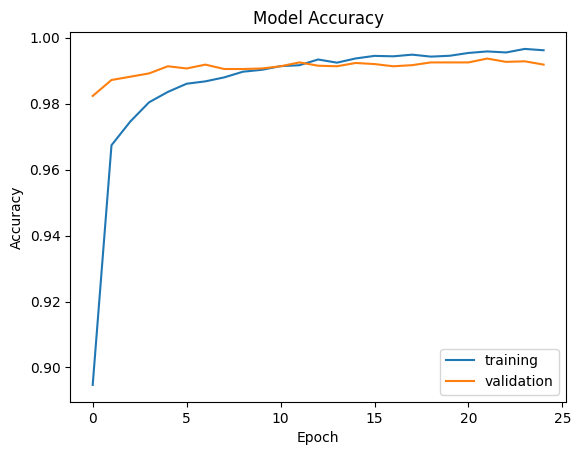

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')